In [94]:
from RWTHColors import ColorManager

cm = ColorManager()

plot_colors = []
plot_colors_light = []
color_list = [
    cm.RWTHBlau,
    #   cm.RWTHPetrol,
    cm.RWTHTuerkis,
    cm.RWTHGruen,
    cm.RWTHMaiGruen,
    cm.RWTHOrange,
    cm.RWTHRot,
    # cm.RWTHBordeaux,
    # cm.RWTHViolett,
    cm.RWTHLila,
]
intensities = [100, 50, 10]

for intensity in intensities:
    for color in color_list:
        plot_colors.append(color.p(intensity))

for intensity in [75, 50, 10]:
    for color in color_list:
        plot_colors_light.append(color.p(intensity))

In [95]:
import pandas as pd

In [96]:
component_contributions_df = pd.read_excel("component_contributions_distributed_20240701.xlsx", index_col=0)
addons = component_contributions_df.sum().values
addons

array([1.34398627e+10, 3.35996568e+10, 3.35996568e+10, 1.34398627e+10,
       1.91170057e+10, 3.18616762e+10, 1.34398627e+10, 3.16122084e+10,
       2.72537662e+10, 9.75936911e+09, 1.33425791e+10, 2.12189164e+10])

In [97]:
static = component_contributions_df.iloc[:, :6]

In [98]:
rcp26 = component_contributions_df.iloc[:, 6:]

In [99]:
rcp19 = pd.read_excel("component_contributions_distributed_RCP19.xlsx", index_col=0)
base = pd.read_excel("component_contributions_distributed_Base.xlsx", index_col=0)

In [100]:
static_sum = static.sum().reset_index(drop=True)
base_sum = base.sum().reset_index(drop=True)
rcp26_sum = rcp26.sum().reset_index(drop=True)
rcp19_sum = rcp19.sum().reset_index(drop=True)

df = pd.DataFrame(
    {
        "Static": static_sum,
        "SSP2-Baseline": base_sum,
        "SSP2-RCP-2.6": rcp26_sum,
        "SSP2-RCP-1.9": rcp19_sum,
    }
)

In [101]:
df_scaled = df / 1e9

In [102]:
df_scaled.index = [2025, 2030, 2035, 2037, 2040, 2045]

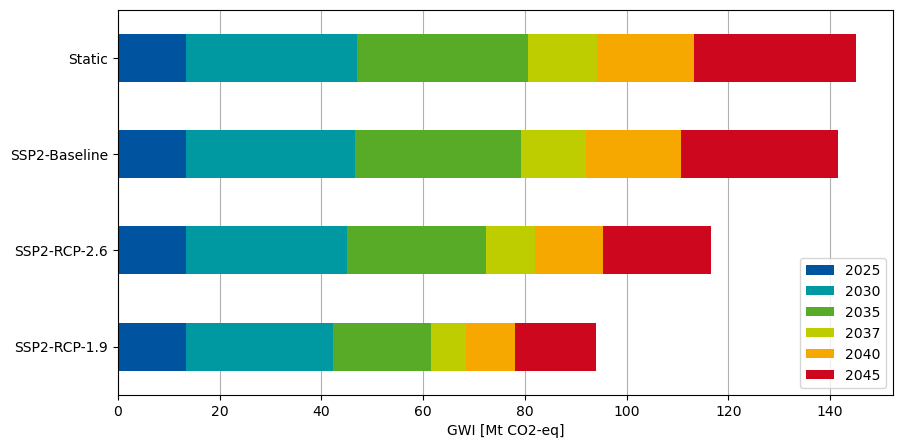

In [103]:
from matplotlib import pyplot as plt

df_scaled.T.iloc[::-1].plot(kind="barh", stacked=True, color=plot_colors, xlabel="GWI [Mt CO2-eq]", grid=False, figsize=(10, 5), zorder=2)
plt.grid(axis="x")
plt.savefig("background_scenario_sensitivity.svg", format="svg", bbox_inches="tight")